<a href="https://colab.research.google.com/github/LeonGoergen/DocumentClassification/blob/main/dataPrep/Dataset_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tabulate import tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation

## Data Exploration

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bachelor Thesis/Datasets/data_original.csv', header=0)
data.head()

<ipython-input-3-f1d959a163bc>:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Bachelor Thesis/Datasets/data_original.csv', header=0)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-12-29,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,NaN,Ocwen Financial Corporation,TX,76103.0,NaN,NaN,Web,2022-12-29,In progress,Yes,NaN,6375159
1,2022-12-24,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I opened up a account online XXXX weeks ago an...,Company has responded to the consumer and the ...,BMO HARRIS BANK NATIONAL ASSOCIATION,AZ,85301.0,Servicemember,Consent provided,Web,2022-12-24,Closed with explanation,Yes,NaN,6358144
2,2022-12-24,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,DISCOVER BANK,FL,33009.0,NaN,NaN,Web,2022-12-24,Closed with non-monetary relief,Yes,NaN,6355921
3,2022-12-20,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,Received credit card statement dated XX/XX/22 ...,Company has responded to the consumer and the ...,U.S. BANCORP,OH,45377.0,NaN,Consent provided,Web,2022-12-20,Closed with non-monetary relief,Yes,NaN,6338237
4,2023-01-04,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,23513.0,NaN,NaN,Web,2023-01-04,In progress,Yes,NaN,6389694


In [ ]:
def get_entropy(class_labels):
    array = []

    # get the names of unique classes in the dataset
    class_names = np.unique(class_labels, return_counts=True)[0]
    array.append(class_names)

    # calculate the number of instances in each class
    class_counts = np.unique(class_labels, return_counts=True)[1]
    array.append(class_counts)

    # calculate the proportion of instances in each class
    class_proportions = class_counts / len(class_labels)
    class_percentages = ['{:.2f}%'.format(p * 100) for p in class_proportions]
    array.append(class_percentages)

    # calculate the shannon entropy
    entropy = 0
    for count in class_counts:
        p = count / sum(class_counts)
        if p > 0:
            entropy += -p * math.log(p)
    entropy /= math.log(len(class_counts))

    print(tabulate(array))
    print(f"\nShannon Entropy: {entropy * 100:.4f}%")

In [ ]:
get_entropy(data['Product'].values)

-----------------------  ---------------------------  -------------  -----------  ---------------------------  ----------------  ----------------------------------------------------------------------------  ---------------  --------------------------------------------------  ---------------  --------  -----------------------  -----------  -----------------------------------------  ------------  ------------  ---------------------  ----------------
Bank account or service  Checking or savings account  Consumer Loan  Credit card  Credit card or prepaid card  Credit reporting  Credit reporting, credit repair services, or other personal consumer reports  Debt collection  Money transfer, virtual currency, or money service  Money transfers  Mortgage  Other financial service  Payday loan  Payday loan, title loan, or personal loan  Prepaid card  Student loan  Vehicle loan or lease  Virtual currency
86206                    146542                       31596          89190        170426        

In [ ]:
nan = data[data['Consumer complaint narrative'].isna()]
data = data[data['Consumer complaint narrative'].notna()]
print("Number of documents without further textual explanations: " + str(nan.shape[0]))
print("Remaining documents: " + str(data.shape[0]))

Number of documents without further textual explanations: 2056568
Remaining documents: 1161464


In [ ]:
print("Number of duplicates: " + str(data.shape[0] - data['Consumer complaint narrative'].nunique()))

Number of duplicates: 150566


In [ ]:
data.drop_duplicates(subset="Consumer complaint narrative", inplace=True)
print("Remaining documents: " + str(data.shape[0]))

Remaining documents: 1010898


In [ ]:
focus = 'Product'
print("Number of unique Products: " + str(data[focus].nunique()) + "\n")
data[focus].value_counts()

Number of unique Products: 18



Credit reporting, credit repair services, or other personal consumer reports    414070
Debt collection                                                                 185167
Mortgage                                                                         99025
Credit card or prepaid card                                                      83331
Checking or savings account                                                      56696
Student loan                                                                     33450
Credit reporting                                                                 29792
Money transfer, virtual currency, or money service                               27254
Vehicle loan or lease                                                            20192
Credit card                                                                      18738
Bank account or service                                                          14852
Payday loan, title loan, or personal loan  

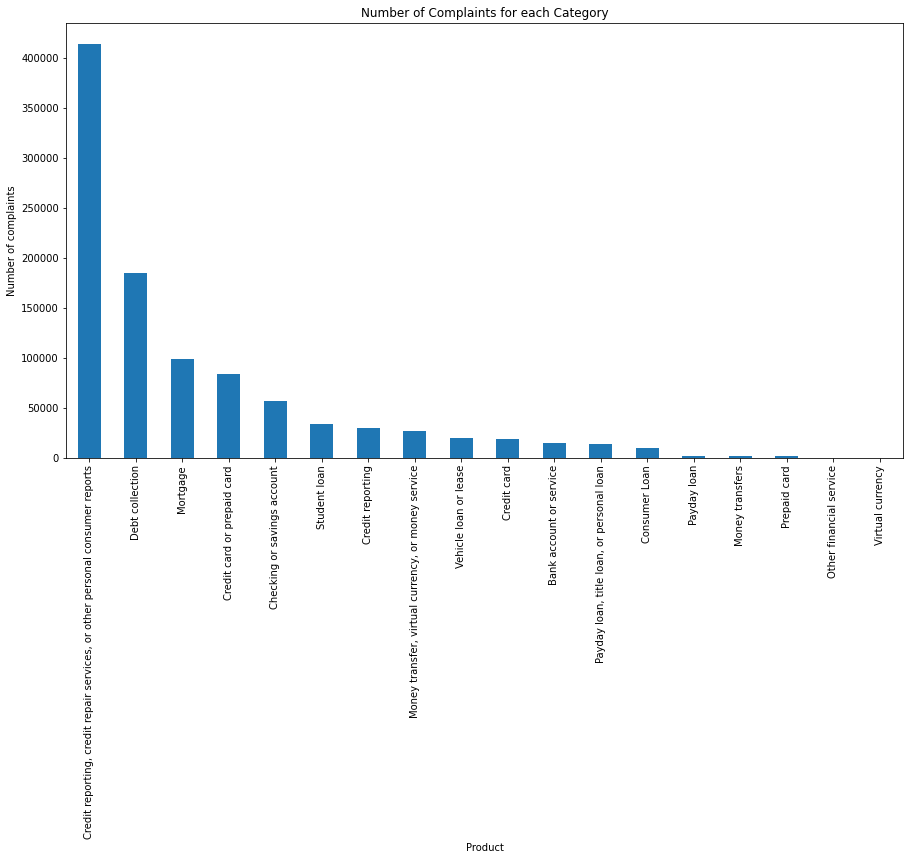

In [ ]:
data[focus].value_counts().plot.bar(figsize=(15,8), title="Number of Complaints for each Category", xlabel="Product", ylabel="Number of complaints")

After reviewing the categories, it may be beneficial to consolidate certain categories for improved analysis. This consolidation is inspired by the work of [Susan Li](https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17).




In [ ]:
data.loc[data['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
data.loc[data['Product'] == 'Prepaid card', 'Product'] = 'Credit card or prepaid card'
data.loc[data['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
data.loc[data['Product'] == 'Money transfers', 'Product'] = 'Money transfer, virtual currency, or money service'
data.loc[data['Product'] == 'Bank account or service', 'Product'] = 'Bank, checking or savings account'
data.loc[data['Product'] == 'Checking or savings account', 'Product'] = 'Bank, checking or savings account'
data.loc[data['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
data.loc[data['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
data = data[data.Product != 'Other financial service']

In [ ]:
print("Number of unique Products: " + str(data[focus].nunique()) + "\n")
data[focus].value_counts()

Number of unique Products: 10



Credit reporting, credit repair services, or other personal consumer reports    443862
Debt collection                                                                 185167
Credit card or prepaid card                                                     103516
Mortgage                                                                         99025
Bank, checking or savings account                                                71548
Student loan                                                                     33450
Money transfer, virtual currency, or money service                               28764
Vehicle loan or lease                                                            20192
Payday loan, title loan, or personal loan                                        15657
Consumer Loan                                                                     9426
Name: Product, dtype: int64

## Data Balancing

In [ ]:
columns = data.columns
min_complaints = int(data[focus].value_counts().min())
df = pd.DataFrame(columns=columns)
for product in data[focus].unique():
    sub_data = data.loc[data[focus] == product]
    sub_data = shuffle(sub_data)
    sub_data = sub_data.head(min_complaints)
    df = df.append(sub_data)

df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
78817,2022-09-01,"Bank, checking or savings account",Checking account,Opening an account,Account opened as a result of fraud,Someone opened a fraudulent checking account w...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",VA,23113.0,NaN,Consent provided,Web,2022-09-01,Closed with explanation,Yes,NaN,5942033
1432305,2018-10-12,"Bank, checking or savings account",Checking account,Managing an account,Banking errors,"On XX/XX/XXXX, I first went to my bank and wit...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,92782.0,NaN,Consent provided,Web,2018-10-12,Closed with explanation,Yes,NaN,3044004
2244712,2016-08-24,"Bank, checking or savings account",Checking account,"Making/receiving payments, sending money",NaN,My business wrote a check to our wholesaler XX...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NY,14221.0,NaN,Consent provided,Web,2016-08-24,Closed,Yes,No,2078770
1510626,2018-08-01,"Bank, checking or savings account",Other banking product or service,Managing an account,Deposits and withdrawals,"In XXXX, my parents purchased a savings certif...",Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,PA,19335.0,NaN,Consent provided,Web,2018-08-01,Closed with non-monetary relief,Yes,NaN,2979658
2164074,2017-04-28,"Bank, checking or savings account",Checking account,Opening an account,Didn't receive terms that were advertised,"In mid XXXX XXXX , I responded to the Bank ...",Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",TN,38016,NaN,Consent provided,Web,2017-04-28,Closed with monetary relief,Yes,NaN,2469542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921036,2015-12-07,Consumer Loan,Vehicle loan,Taking out the loan or lease,NaN,"My vehicle, originally financed with Capital O...",NaN,CAPITAL ONE FINANCIAL CORPORATION,TX,76120,NaN,Consent provided,Web,2015-12-07,Closed with explanation,Yes,No,1685412
1822559,2016-05-31,Consumer Loan,Installment loan,Managing the loan or lease,NaN,Due to new information I 'm submitting a new i...,Company believes the complaint is the result o...,Ditech Financial LLC,OR,97520,NaN,Consent provided,Web,2016-06-02,Closed with explanation,Yes,No,1947823
3181052,2016-03-28,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Debt on my credit for {$3000.00} states a char...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,WI,53227,NaN,Consent provided,Web,2016-03-28,Closed with explanation,Yes,Yes,1851465
2612407,2015-04-08,Consumer Loan,Vehicle loan,Problems when you are unable to pay,NaN,24 % interest rate high pmts refuses to help w...,NaN,Santander Consumer USA Holdings Inc.,GA,30650.0,NaN,Consent provided,Web,2015-04-08,Closed with explanation,Yes,No,1320770


In [ ]:
get_entropy(data['Product'].values)

---------------------------------  -------------  ---------------------------  ----------------------------------------------------------------------------  ---------------  --------------------------------------------------  --------  -----------------------------------------  ------------  ---------------------
Bank, checking or savings account  Consumer Loan  Credit card or prepaid card  Credit reporting, credit repair services, or other personal consumer reports  Debt collection  Money transfer, virtual currency, or money service  Mortgage  Payday loan, title loan, or personal loan  Student loan  Vehicle loan or lease
9426                               9426           9426                         9426                                                                          9426             9426                                                9426      9426                                       9426          9426
10.00%                             10.00%         10.00%                

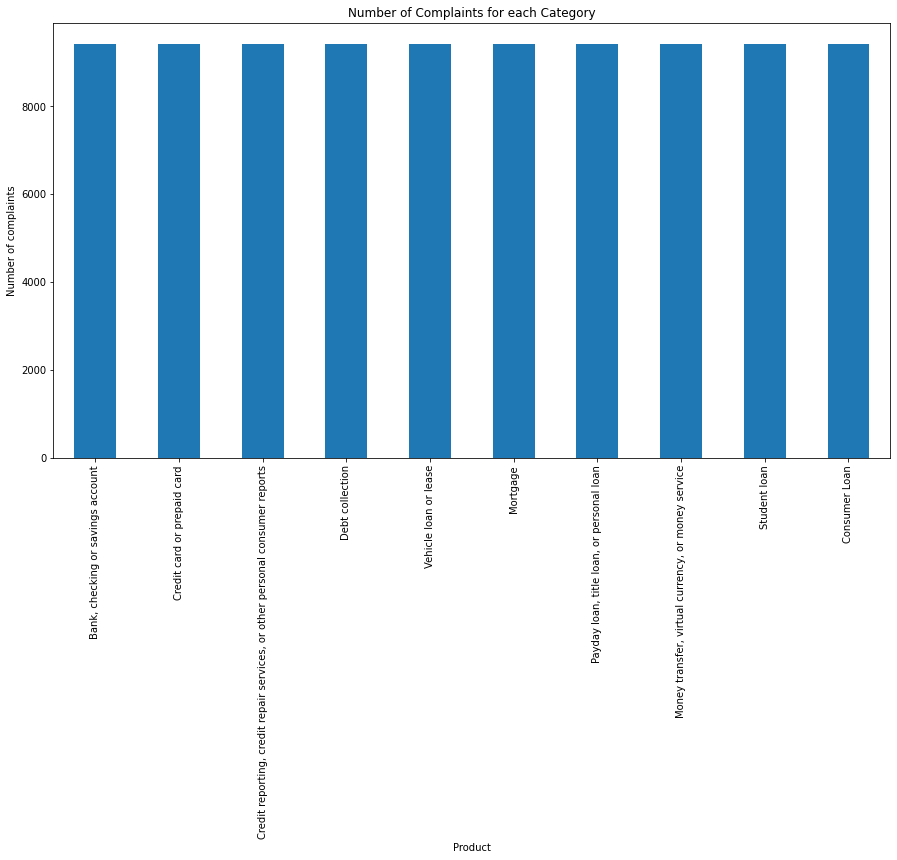

In [ ]:
df[focus].value_counts().plot.bar(figsize=(15,8), title="Number of Complaints for each Category", xlabel="Product", ylabel="Number of complaints")

## train - test split

In [ ]:
train, test = train_test_split(df, test_size = 0.15, random_state=1)

In [ ]:
print("Number of Documents in train: " + str(train.shape[0]))
print("Number of Documents in test: " + str(test.shape[0]))

Number of Documents in train: 80121
Number of Documents in test: 14139


In [ ]:
get_entropy(train['Product'].values)

---------------------------------  -------------  ---------------------------  ----------------------------------------------------------------------------  ---------------  --------------------------------------------------  --------  -----------------------------------------  ------------  ---------------------
Bank, checking or savings account  Consumer Loan  Credit card or prepaid card  Credit reporting, credit repair services, or other personal consumer reports  Debt collection  Money transfer, virtual currency, or money service  Mortgage  Payday loan, title loan, or personal loan  Student loan  Vehicle loan or lease
7981                               8061           7909                         7998                                                                          8040             7985                                                8017      8016                                       8075          8039
9.96%                              10.06%         9.87%                 

In [ ]:
get_entropy(test['Product'].values)

---------------------------------  -------------  ---------------------------  ----------------------------------------------------------------------------  ---------------  --------------------------------------------------  --------  -----------------------------------------  ------------  ---------------------
Bank, checking or savings account  Consumer Loan  Credit card or prepaid card  Credit reporting, credit repair services, or other personal consumer reports  Debt collection  Money transfer, virtual currency, or money service  Mortgage  Payday loan, title loan, or personal loan  Student loan  Vehicle loan or lease
1445                               1365           1517                         1428                                                                          1386             1441                                                1409      1410                                       1351          1387
10.22%                             9.65%          10.73%                

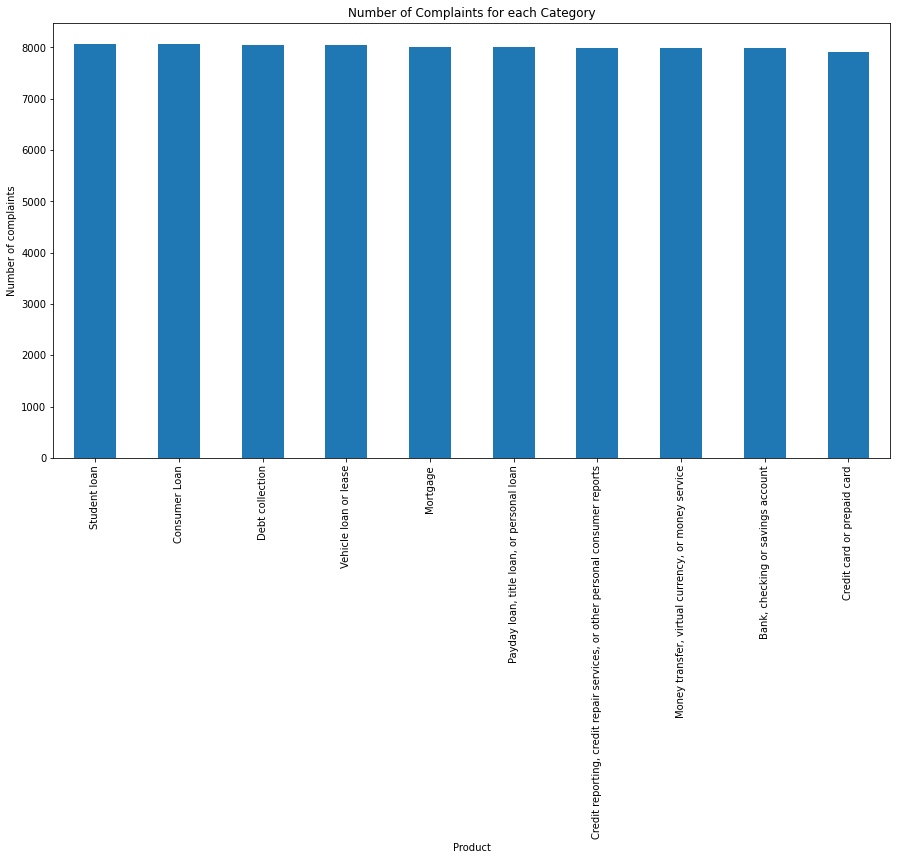

In [ ]:
train[focus].value_counts().plot.bar(figsize=(15,8), title="Number of Complaints for each Category", xlabel="Product", ylabel="Number of complaints")

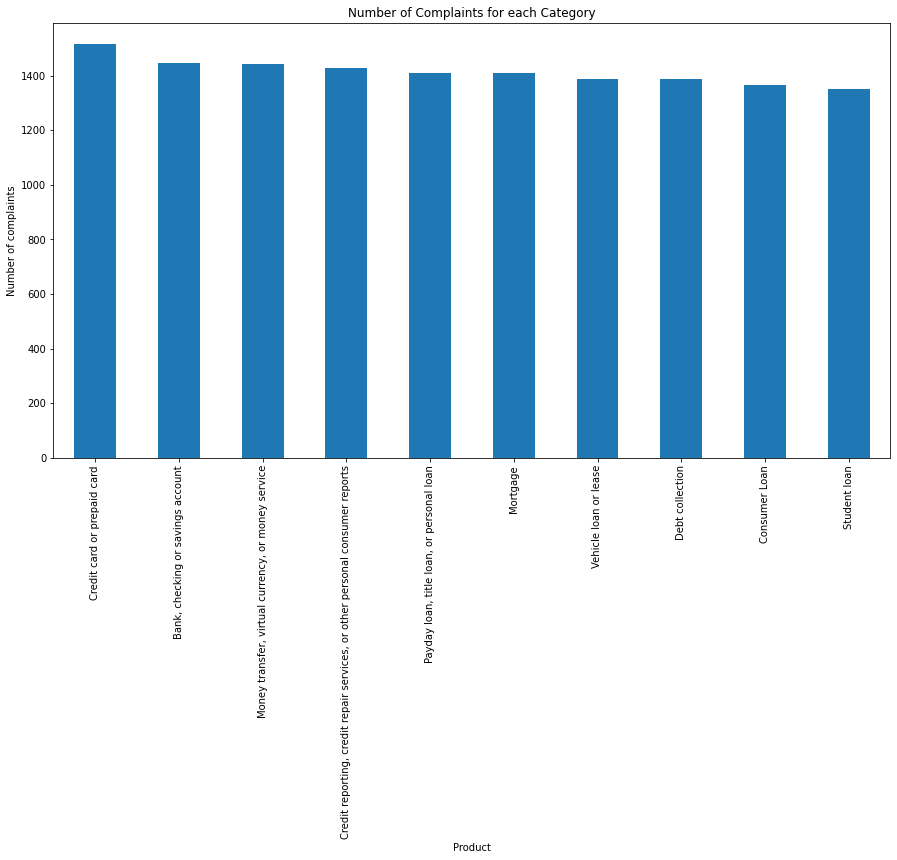

In [ ]:
test[focus].value_counts().plot.bar(figsize=(15,8), title="Number of Complaints for each Category", xlabel="Product", ylabel="Number of complaints")

# Save

The balanced dataset will now be saved with the appendix "_nopreprocess", as the textual preprocssing steps will be done in [another Notebook](https://colab.research.google.com/drive/1in0CLK2aOCuzsYlCLqyAyg28B3YNE6YC?usp=sharing).

In [ ]:
train.to_csv("/content/drive/MyDrive/Bachelor Thesis/Datasets/train_nopreprocess.csv", sep='\t', index=False)
test.to_csv("/content/drive/MyDrive/Bachelor Thesis/Datasets/test_nopreprocess.csv", sep='\t', index=False)